In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io import sql
from sqlalchemy import create_engine
import csv
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
tqdm.pandas()

/Users/max/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
db_user = 'postgres'
db_password = ''
db_host = 'localhost'
db_port = 5432
database = 'climbing'

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
connection = create_engine(conn_str)

In [4]:
df_users_sql = pd.read_sql('select * from users',connection,index_col='index')
df_users_sql['climbs'] = [eval(flat) for flat in df_users_sql['climbs_flat']]
df_users_sql = df_users_sql.drop('climbs_flat',axis=1)
df_users=df_users_sql

In [5]:
df_crags = pd.read_sql('select * from crags',connection,index_col='index')
df_crags['climb_list'] = [eval(flat) for flat in df_crags['climbs_flat']]
df_crags = df_crags.drop('climbs_flat',axis=1)
df_crags

,url,cragname,climbs,rocktype,altitude,faces,lat,long,climb_list
index,,,,,,,,,
4,https://www.ukclimbing.com/logbook/crag.php?id=4,Dinas Cromlech,79,Rhyolite,500.0,S,53.0917,-4.0489,"[(3166, 0), (3167, 0), (3168, 3), (3169, 1), (..."
5,https://www.ukclimbing.com/logbook/crag.php?id=5,Bus Stop Quarry,115,Slate,450.0,None,53.1294,-4.1058,"[(141016, 1), (136481, 1), (134391, 1), (1309,..."
6,https://www.ukclimbing.com/logbook/crag.php?id=6,Craig Pant Ifan (Tremadog),176,Dolerite,NaN,S,52.9436,-4.1311,"[(152703, 0), (100182, 1), (2561, 2), (2562, 2..."
7,https://www.ukclimbing.com/logbook/crag.php?id=7,St. Govan's Head,151,Limestone,12.0,SW,51.5977,-4.9277,"[(401447, 0), (138693, 1), (58187, 1), (150671..."
8,https://www.ukclimbing.com/logbook/crag.php?id=8,Carreg-y-Barcud Area,128,Sandstone (hard),13.0,S,51.8719,-5.2350,"[(503566, 0), (503567, 0), (503568, 0), (50356..."
...,...,...,...,...,...,...,...,...,...
27429,https://www.ukclimbing.com/logbook/crag.php?id...,Gap Bon ami boulders,0,UNKNOWN,NaN,None,48.8067,-64.2198,[]
27430,https://www.ukclimbing.com/logbook/crag.php?id...,Metal Expert,8,UNKNOWN,NaN,None,45.5454,25.5181,"[(560519, 3), (560520, 3), (560521, 0), (56052..."
27431,https://www.ukclimbing.com/logbook/crag.php?id...,Las Palomas,3,UNKNOWN,NaN,None,28.1159,-16.5589,"[(560451, 2), (560452, 2), (560453, 2)]"


In [6]:
uk_crags = df_crags[(df_crags['lat']>50)&(df_crags['long']>-8.2)&(df_crags['lat']<58.9)&(df_crags['long']<2.1)].index

In [7]:
df_climbs = pd.read_sql('select * from climbs',connection,index_col='index')
df_climbs['logs'] = [eval(flat) for flat in df_climbs['logs_flat']]
df_climbs = df_climbs.drop('logs_flat',axis=1)
df_climbs

,id,url,climbname,rating,grade,crag_id,desc,num_comments,type,comments_flat,logs
index,,,,,,,,,,,
3166,3166,https://www.ukclimbing.com/logbook/c.php?i=3166,Millwood's Wall,0,S 4a,4,,0,trad,' ',{}
3167,3167,https://www.ukclimbing.com/logbook/c.php?i=3167,Vanishing Point,0,E1 5b,4,,2,trad,' ',"{'187067': '', '63530': ''}"
3168,3168,https://www.ukclimbing.com/logbook/c.php?i=3168,The Thing,3,E2 5c,4,,124,trad,""" Joe led this in one pitch, taking the direc...","{'253245': '', '206609': 'Joe led this in one ..."
3169,3169,https://www.ukclimbing.com/logbook/c.php?i=3169,Rootorooni,1,E3 5c,4,,0,trad,' ',{}
3170,3170,https://www.ukclimbing.com/logbook/c.php?i=3170,Cobweb Crack,2,VS 5a,4,,181,trad,' Note that the description in the CC Llanb...,"{'185136': '', '197782': '', '6106': '', '2410..."
...,...,...,...,...,...,...,...,...,...,...,...
560510,560510,https://www.ukclimbing.com/logbook/c.php?i=560510,El chivo loco,0,6b,27432,,0,lead,' ',{}
560511,560511,https://www.ukclimbing.com/logbook/c.php?i=560511,Victorking,0,6b+,27432,,0,lead,' ',{}
560512,560512,https://www.ukclimbing.com/logbook/c.php?i=560512,Puto Maldonado,0,6c+,27432,,0,lead,' ',{}


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
df_climbs['in_uk'] = df_climbs.crag_id.map(lambda x : x in uk_crags)

In [10]:
df_test = df_climbs[(df_climbs['type']=='boulder')&(df_climbs['comments_flat']!="''")&(df_climbs['comments_flat']!="' '")&(df_climbs['in_uk']==True)]

In [11]:
import re

In [12]:
from nltk.stem import PorterStemmer 

In [13]:

ps = PorterStemmer()

In [83]:
def split_and_stem(x):



    words = re.sub(r"""
               [\\,.;@#?!&$\']+  # Accept one or more copies of punctuation
               \ *           # plus zero or more copies of a space,
               """,
               " ",          # and replace it with a single space
               x, flags=re.VERBOSE)
    words = re.sub("rockfax","",words).split()
    words = [ps.stem(word).lower() for word in words]
    flat = " ".join(words)
    return flat

In [84]:
df_test['comments_flat'] = df_test.comments_flat.progress_map(split_and_stem)

/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_test.comments_flat

index
408591    sit start right of lepidopterist at the layawa...
407472    a neat left to right traver of the freezer wal...
407572    the crack to the right of the flake of wrath n...
391777              right hand side hard start bad land r n
391772    30m start for equinox and traver all the way t...
                                ...                        
559492    layback the right aret on lh side - no handhol...
559502    climb the right aret on the lh side use hold o...
559493    layback the right aret on the rh side - no hol...
559503              the right aret use hold on the wall r n
560218    start with two hand in the low crack then move...
Name: comments_flat, Length: 53643, dtype: object

In [86]:
cv_climbing_words = TfidfVectorizer(ngram_range=(1,2),stop_words='english')

climbs_nlp_spmat = cv_climbing_words.fit_transform(df_test.comments_flat.values)
climbs_nlp_spmat

<53643x352182 sparse matrix of type '<class 'numpy.float64'>'
	with 1790257 stored elements in Compressed Sparse Row format>

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [88]:
def num_there(s):
    return any(i.isdigit() for i in s)

In [89]:
def get_vocab(columns):
    vocab = []
    for i in tqdm(columns):
        sent = analyser.polarity_scores(i)
        if len(i.split())==1 and sent['neu'] == 1 and num_there(i)==False:
            vocab.append(i.lower())
        elif len(i.split())==2 and sent['neu'] < 0.5 and num_there(i)==False:
            vocab.append(i.lower())
    return vocab

In [90]:
vocab = get_vocab(cv_climbing_words.get_feature_names())

In [91]:
with open('../part-03/list_of_words.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
# vocab = np.array(data[0])

In [92]:
vocab=np.unique(vocab)

In [93]:
vocab

array(['_estuari', '_q', 'aa', ..., 'zuman hard', 'zz', 'zz gain'],
      dtype='<U40')

In [94]:
cv_climbing_words = TfidfVectorizer(stop_words='english',vocabulary=vocab)

climbs_nlp_spmat = cv_climbing_words.fit_transform(df_test.comments_flat.values)
climbs_nlp_spmat

<53643x85827 sparse matrix of type '<class 'numpy.float64'>'
	with 696951 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.cluster import KMeans,Birch
from sklearn.decomposition import TruncatedSVD

In [96]:
from scipy.sparse import csr_matrix

In [97]:
pca = TruncatedSVD(n_components=20)

In [98]:

data_fit = pca.fit_transform(climbs_nlp_spmat)

In [99]:
len(data_fit)

53643

In [100]:
model = KMeans(n_clusters=50)
model.fit(data_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
df_test['labels'] = model.labels_

/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_test.labels.value_counts()

1     10122
33     3038
40     3014
38     1834
49     1740
2      1705
29     1690
28     1661
42     1583
5      1403
48     1343
17     1290
34     1273
20     1240
14     1198
12     1124
31     1096
44     1045
4       994
10      953
7       942
9       921
13      911
27      893
39      878
36      822
15      729
21      628
0       568
11      539
41      534
3       524
22      501
8       492
23      398
16      398
30      366
32      362
45      353
26      338
24      324
35      272
47      268
43      260
19      232
46      224
25      191
37      174
18      156
6        99
Name: labels, dtype: int64

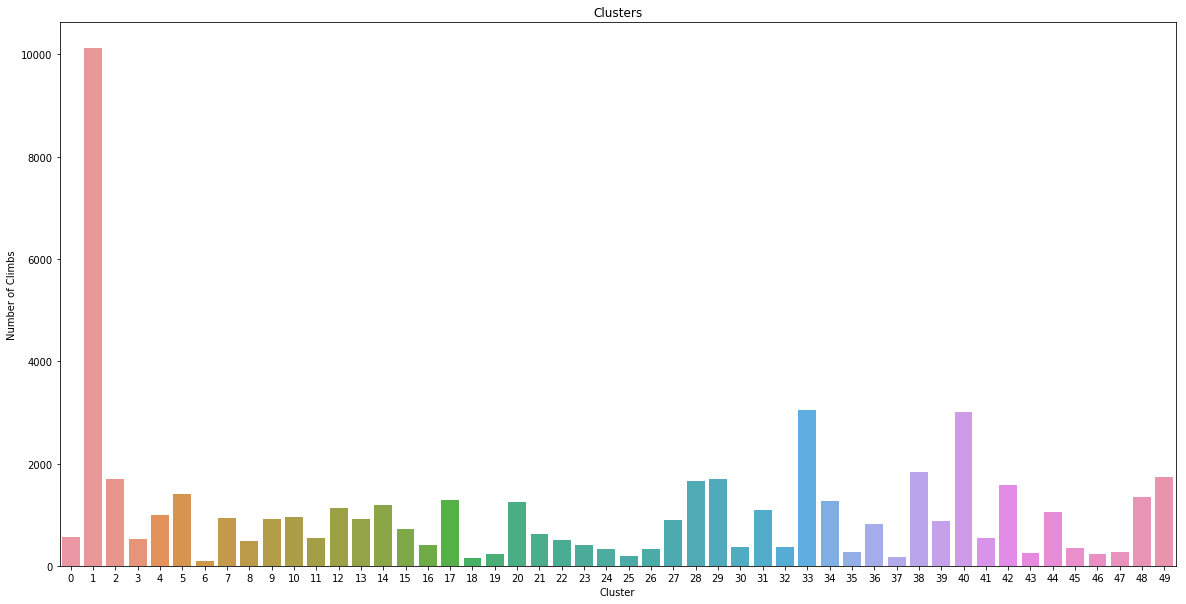

In [103]:
fig,ax = plt.subplots(figsize=(20,10))
to_plot = df_test.labels.value_counts()
sns.barplot(x=to_plot.index,y=to_plot.values)
ax.set_title('Clusters')
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Climbs')
fig.savefig('climbs_per_cluster.png')

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
checker_tf = CountVectorizer(stop_words='english')
label_15 = checker_tf.fit_transform(df_test[(df_test['labels']==12)].comments_flat.values)
pd.DataFrame(label_15.toarray(),columns=checker_tf.get_feature_names()).sum().sort_values(ascending=False).head(3)

climb    1485
start     293
right     289
dtype: int64

In [106]:
from wordcloud import WordCloud

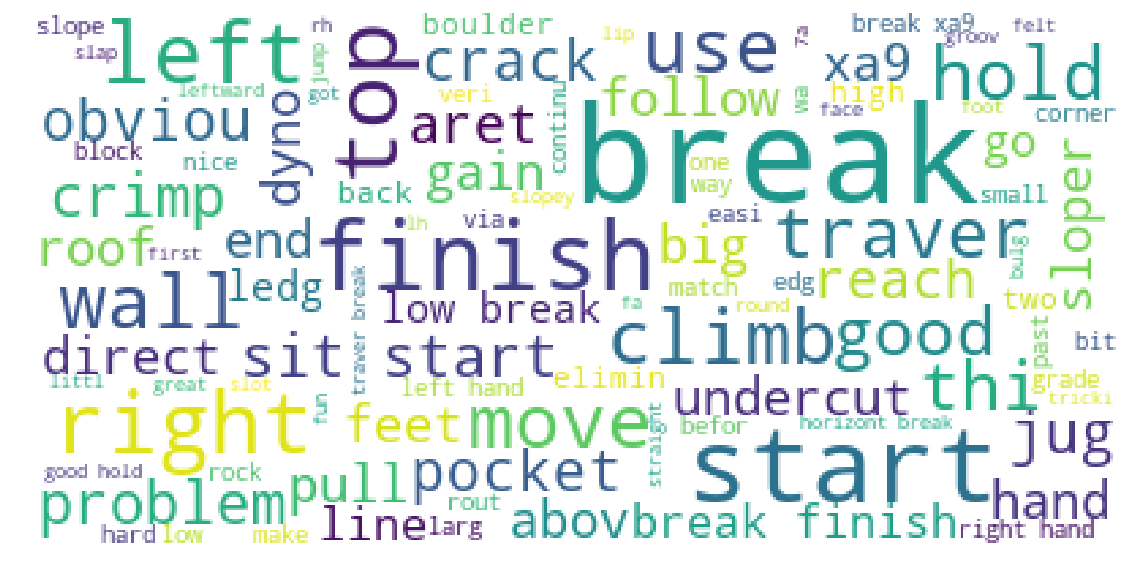

In [110]:
fig,ax = plt.subplots(figsize=(20,10))
plt.imshow(plot_word_cloud(df_test[(df_test['labels']==20)].comments_flat.values))
plt.axis('off')
fig.savefig('cluster_19.png')

In [40]:

def plot_word_cloud(list_of_comments):
    text = " ".join(list_of_comments)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    return wordcloud

In [41]:
def col_to_flat(comments_flat):
    total_flat = ""
    for comments in tqdm(comments_flat):
        for word in comments.split():
           if word in vocab:
                total_flat = total_flat + " " + word 
    return total_flat

In [ ]:
from IPython.display import clear_output

In [ ]:

# rows=6
# cols=6
# fig,ax = plt.subplots(figsize=(20,20), ncols=cols,nrows=rows)
# count = 0
# for i in range(0,rows):
#     for j in range(0,cols):
#         clear_output()
#         print(count)
#         plot_words = col_to_flat(df_test[df_test['labels']==count].comments_flat)
#         ax[i][j].imshow(plot_word_cloud(plot_words))
#         count +=1
# plt.show()

# Reccomendation

In [111]:
clusters = df_test.labels.unique()

In [112]:
df_climbs.head()

,id,url,climbname,rating,grade,crag_id,desc,num_comments,type,comments_flat,logs,in_uk
index,,,,,,,,,,,,
3166,3166,https://www.ukclimbing.com/logbook/c.php?i=3166,Millwood's Wall,0,S 4a,4,,0,trad,' ',{},True
3167,3167,https://www.ukclimbing.com/logbook/c.php?i=3167,Vanishing Point,0,E1 5b,4,,2,trad,' ',"{'187067': '', '63530': ''}",True
3168,3168,https://www.ukclimbing.com/logbook/c.php?i=3168,The Thing,3,E2 5c,4,,124,trad,""" Joe led this in one pitch, taking the direc...","{'253245': '', '206609': 'Joe led this in one ...",True
3169,3169,https://www.ukclimbing.com/logbook/c.php?i=3169,Rootorooni,1,E3 5c,4,,0,trad,' ',{},True
3170,3170,https://www.ukclimbing.com/logbook/c.php?i=3170,Cobweb Crack,2,VS 5a,4,,181,trad,' Note that the description in the CC Llanb...,"{'185136': '', '197782': '', '6106': '', '2410...",True


In [113]:
df_users.head()

,id,logbook_url,profile_url,username,num_climbs,climbs
index,,,,,,
100002,100002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Stephanelericolais,3,"[42012, 18853, 147314]"
10002,10002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Piers Harley,325,"[8359, 10726, 10731, 10732, 10735, 10744, 1077..."
100025,100025,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,george5699,15,"[31435, 33329, 40976, 42231, 86139, 35261, 352..."
100031,100031,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Tak,16,"[10917, 10941, 10969, 10971, 10328, 10342, 103..."
100045,100045,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,smeaton,46,"[10729, 10731, 10735, 10814, 10816, 10837, 108..."


In [114]:
import scipy

In [115]:
df_rec = df_users_sql.climbs.progress_apply(pd.Series)

In [116]:
df_rec = df_rec.fillna(0).T

In [117]:
rec_mat = scipy.sparse.csr_matrix(df_rec).transpose()

In [118]:
rec_mat

<33062x13523 sparse matrix of type '<class 'numpy.float64'>'
	with 4544497 stored elements in Compressed Sparse Column format>

In [119]:
df_climbs['labels']=df_test['labels']

In [120]:
df_climbs.columns

Index(['id', 'url', 'climbname', 'rating', 'grade', 'crag_id', 'desc',
       'num_comments', 'type', 'comments_flat', 'logs', 'in_uk', 'labels'],
      dtype='object')

In [125]:
df_test.loc[0] = {'id':'0','url':'1','climbname':'1','rating':'1','grade':'1','crag_id':'1','num_comments':'1','desc':'1','logs':'1','labels':-1,'comments_flat':'1','type':'other','in_uk':True}



/Users/max/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
df_climbs.loc[0]

id                   0
url                  1
climbname            1
rating               1
grade                1
crag_id              1
desc                 1
num_comments         1
type             other
comments_flat        1
logs                 1
in_uk             True
labels              -1
Name: 0, dtype: object

In [131]:
label_dic = df_climbs[['labels']].fillna(-1).to_dict()['labels']

In [132]:
label_dic[0]

-1.0

In [133]:
df_rec

index,100002,10002,100025,100031,100045,100046,100066,100069,100075,10008,...,99926,99929,99931,99933,99939,99962,99967,99978,99997,99999
0,42012.0,8359.0,31435.0,10917.0,10729.0,1312.0,10837.0,30994.0,1862.0,29256.0,...,3195.0,1316.0,3202.0,132027.0,2063.0,10370.0,33152.0,8349.0,11041.0,452651.0
1,18853.0,10726.0,33329.0,10941.0,10731.0,1316.0,10354.0,32252.0,0.0,163279.0,...,3202.0,1317.0,2629.0,2343.0,51996.0,14060.0,33154.0,8351.0,10893.0,32723.0
2,147314.0,10731.0,40976.0,10969.0,10735.0,1317.0,10356.0,0.0,0.0,29263.0,...,3212.0,2561.0,2640.0,2353.0,51994.0,14061.0,33286.0,8354.0,10894.0,45132.0
3,0.0,10732.0,42231.0,10971.0,10814.0,5579.0,10359.0,0.0,0.0,29270.0,...,11075.0,2562.0,58187.0,2356.0,55521.0,51492.0,35960.0,4662.0,10241.0,47223.0
4,0.0,10735.0,86139.0,10328.0,10816.0,32696.0,181153.0,0.0,0.0,10775.0,...,11076.0,2564.0,24768.0,2361.0,0.0,14062.0,33289.0,4684.0,10245.0,47272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
df_rec = df_rec.progress_applymap(lambda x: label_dic[x])

In [135]:
df_rec

index,100002,10002,100025,100031,100045,100046,100066,100069,100075,10008,...,99926,99929,99931,99933,99939,99962,99967,99978,99997,99999
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,17.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,33.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,17.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,33.0,-1.0,-1.0,17.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13519,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13520,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13521,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [136]:
df_rec.iloc[:,:10]

index,100002,10002,100025,100031,100045,100046,100066,100069,100075,10008
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,17.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,33.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,33.0,-1.0,-1.0,17.0
...,...,...,...,...,...,...,...,...,...,...
13518,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13519,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13520,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13521,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [137]:
df_clusters = pd.DataFrame(df_rec.progress_apply(lambda x: x.value_counts().to_dict()).to_dict()).fillna(0).drop(-1).sort_index().T

df_clusters.columns = ['cluster_'+str(int(col)) for col in df_clusters.columns]

In [138]:
df_clusters_T = df_clusters.T

In [139]:
df_clusters = df_clusters.div(df_clusters.sum(axis=1),axis=0).fillna(0)

In [140]:
df_clusters.to_sql('clusters',connection,if_exists='replace')

In [141]:
df_clusters

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,...,cluster_40,cluster_41,cluster_42,cluster_43,cluster_44,cluster_45,cluster_46,cluster_47,cluster_48,cluster_49
100002,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
10002,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
100025,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
100031,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
100045,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99962,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
99967,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
99978,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
99997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [142]:
df_climbs['logs_flat'] = [repr(comment) for comment in df_climbs['logs']]
df_climbs.drop('logs',axis=1).to_sql('climbs_labled',connection,if_exists='replace')

In [145]:
df_climbs[(df_climbs['crag_id']==101)&(df_climbs['labels']==15)]

,id,url,climbname,rating,grade,crag_id,desc,num_comments,type,comments_flat,logs,in_uk,labels,logs_flat
index,,,,,,,,,,,,,,
437768,437768,https://www.ukclimbing.com/logbook/c.php?i=437768,Bristol Stool,1,f7A,101,The centre of the square face to a tricky top-...,2,boulder,'The centre of the square face to a tricky top...,{'224045': 'Is this the SS in a midget pocket?'},True,15.0,{'224045': 'Is this the SS in a midget pocket?'}
